# 음식리뷰

In [205]:
# 음식 리뷰
corpus = [
    "샐러드 맛이 깔끔해서 좋아요.",
    "주문한 음식이 늦게 와서 배고팠어요.",
    "피자가 맛있어요.",
    "라면이 너무 짜게 나왔어요.",
    "배달된 치킨이 맛있어요.",
    "메뉴 설명보다 양이 적어요.",
    "주문한 음식이 다른 것으로 와서 다시 주문했어요.",
    "맛은 좋은데 양이 좀 적은 편이에요.",
    "떡볶이의 매운맛이 적절해요.",
    "초밥이 신선해서 좋았어요.",
    "빵이 부드럽고 맛있네요!",
    "스테이크가 너무 질겼어요.",
    "샐러드의 드레싱이 너무 강했어요.",
    "나초의 치즈소스가 맛있었어요.",
    "파스타가 약간 덜 익은 것 같아요.",
    "커피가 너무 진해서 물을 더 추가했어요.",
    "디저트는 달지 않아서 좋았습니다.",
    "음료가 너무 달아서 다음엔 당도 조절할게요.",
    "피자 도우가 너무 두꺼워서 먹기 힘들었어요.",
    "햄버거의 빵이 너무 딱딱해요.",
    "감자튀김이 너무 기름져서 느끼했어요.",
    "치즈케이크가 아주 부드럽고 맛있어요."
]

# Import

In [206]:
# 분석
import pandas as pd
import numpy as np
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
# 정규표현식
import re
# 형태소분석
from konlpy.tag import Okt
# 워드클라우드
from wordcloud import WordCloud

In [207]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud 함수 (밑에 단어 빈도, 중요도로 WordCloud만드는 함수 생성함)

In [208]:
font_path = r'c:\windows\Fonts\malgun.ttf'
stopwords = []

def display_word_cloud(data,/,*, width=1200, height=500, stopwords=[], mask=None):
    wordcloud = WordCloud(
        width=width,
        height=height,
        font_path=font_path,
        random_state=2024,
        background_color='#fff',
        stopwords=stopwords, # 불용어 제거
        mask=mask
    ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

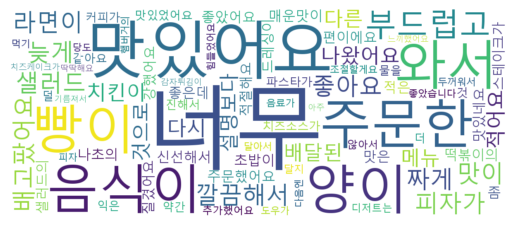

In [209]:
display_word_cloud(' '.join(corpus))

# 전처리 하지 않고

## CountVectorize (단어빈도) - 벡터화

In [210]:
cvect = CountVectorizer(max_features=30)

In [211]:
x_cvect = cvect.fit(corpus)

In [212]:
x_vect_dtm = x_cvect.transform(corpus)

In [213]:
x_vect_dtm

<22x30 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [214]:
x_vect_dtm.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [215]:
pd.DataFrame(x_vect_dtm.toarray(), columns=x_cvect.get_feature_names_out()).head(2)

,감자튀김이,너무,맛있어요,부드럽고,빵이,신선해서,아주,않아서,약간,양이,...,좋았어요,주문한,치즈소스가,치즈케이크가,치킨이,커피가,파스타가,편이에요,피자,피자가
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [216]:
df_x_vect_dtm = pd.DataFrame(x_vect_dtm.toarray(), columns=x_cvect.get_feature_names_out())

In [217]:
df_x_vect_dtm.sum().nlargest()

너무      8
맛있어요    3
부드럽고    2
빵이      2
양이      2
dtype: int64

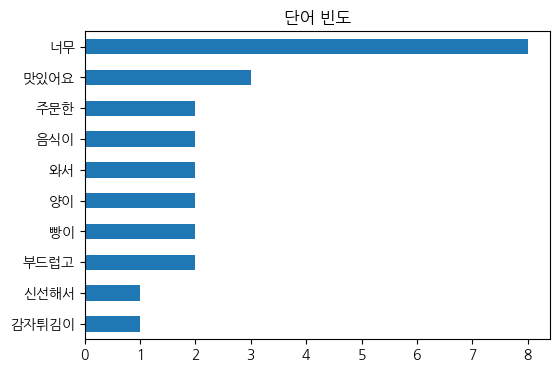

In [218]:
plt.figure(figsize=(6,4))
df_x_vect_dtm.sum().nlargest(10).sort_values().plot.barh()
plt.title('단어 빈도')
plt.show()

## TF-IDF (단어 중요도) - 벡터화

In [219]:
tfidvect = TfidfVectorizer(max_features=30)

In [220]:
x_tfidvect = tfidvect.fit(corpus)

In [221]:
x_tfidvect_dtm = x_tfidvect.transform(corpus)

In [222]:
x_tfidvect_dtm.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.62404738, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [223]:
df_x_tfidvect_dtm = pd.DataFrame(x_tfidvect_dtm.toarray(), columns=x_tfidvect.get_feature_names_out())

In [224]:
df_x_tfidvect_dtm.head(2)

,감자튀김이,너무,맛있어요,부드럽고,빵이,신선해서,아주,않아서,약간,양이,...,좋았어요,주문한,치즈소스가,치즈케이크가,치킨이,커피가,파스타가,편이에요,피자,피자가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


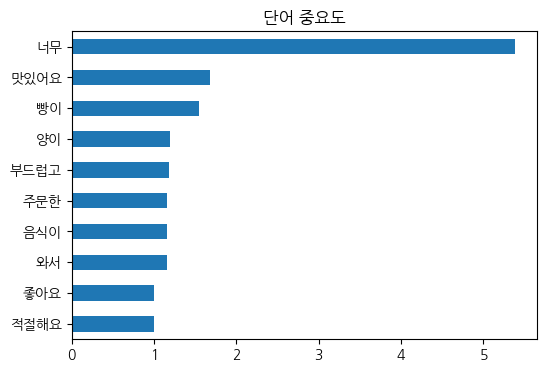

In [225]:
plt.figure(figsize=(6,4))
df_x_tfidvect_dtm.sum().nlargest(10).sort_values().plot.barh()
plt.title('단어 중요도')
plt.show()

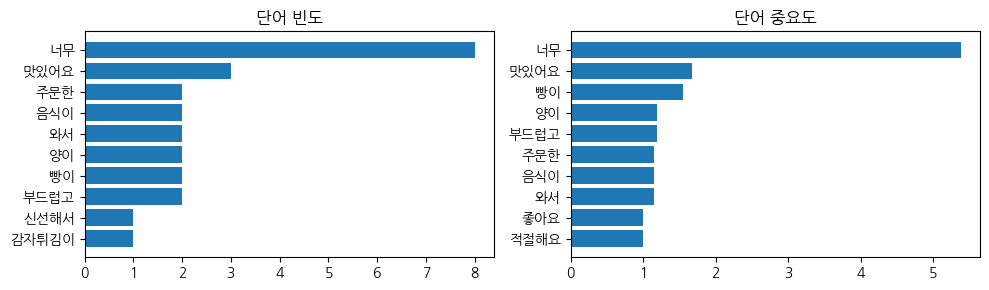

In [226]:
# 바 차트로 시각화
fig, axs = plt.subplots(1, 2, figsize=(10,3))

#단어 빈도
word_frequencies = df_x_vect_dtm.sum().nlargest(10).sort_values()
axs[0].barh(word_frequencies.index, word_frequencies.values)
axs[0].set_title('단어 빈도')


#단어 중요도
word_importances = df_x_tfidvect_dtm.sum().nlargest(10).sort_values()
axs[1].barh(word_importances.index, word_importances.values)
axs[1].set_title('단어 중요도')

# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

## WordCloud 업그레이드

In [227]:
# wc = display_word_cloud('KH 인재교육원')
# wc.generate_from_frequencies({'KH':5, '인재교육원':7}) #가중치를 줄 수 있음
# plt.figure(figsize=(10,5))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [228]:
font_path = r'c:\windows\Fonts\malgun.ttf'
stopwords = []

def display_word_cloud_up(data, weight=None, /,*, width=1200, height=500, stopwords=[], mask=None):
    wordcloud = WordCloud(
        width=width,
        height=height,
        font_path=font_path,
        random_state=2024,
        background_color='#fff',
        stopwords=stopwords, # 불용어 제거
        mask=mask
    ).generate(data)
    
    if weight is not None:
        wordcloud.generate_from_frequencies(weight)  
#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.show()
    return wordcloud

## 워드 클라우드로 시각화

In [229]:
wc_frequencies = display_word_cloud_up(' '.join(df_x_vect_dtm.columns), dict(word_frequencies))
wc_importances = display_word_cloud_up(' '.join(df_x_tfidvect_dtm.columns), dict(word_importances))

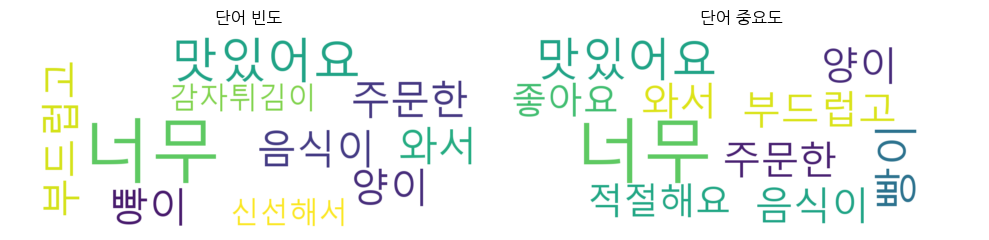

In [230]:
# 워드 클라우드로 시각화
fig, axs = plt.subplots(1, 2, figsize=(10,3))

#단어 빈도
axs[0].imshow(wc_frequencies, interpolation='bilinear')
axs[0].set_title('단어 빈도')
axs[0].axis('off') # 축 표시 제거

#단어 중요도
axs[1].imshow(wc_importances, interpolation='bilinear')
axs[1].set_title('단어 중요도')
axs[1].axis('off') # 축 표시 제거


# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

## 한번에 보여주기

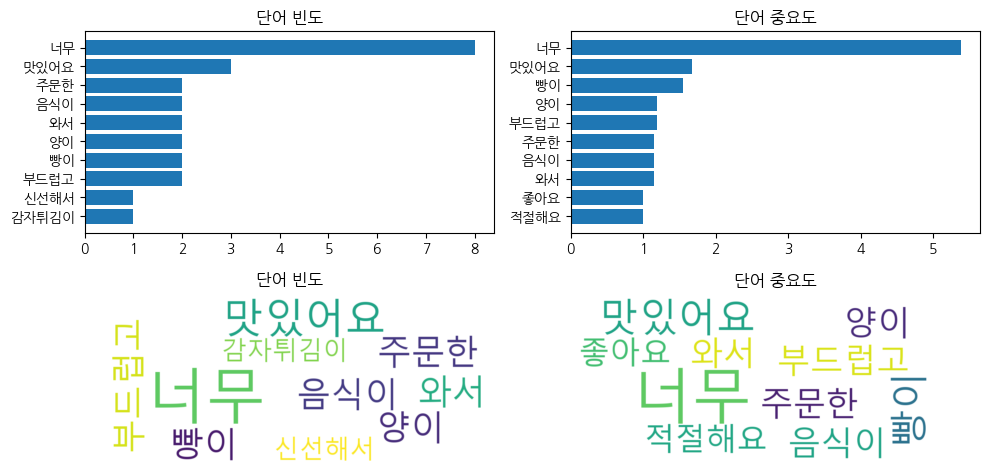

In [231]:
# 바 차트로 시각화
fig, axs = plt.subplots(2, 2, figsize=(10,5))

#단어 빈도
word_frequencies = df_x_vect_dtm.sum().nlargest(10).sort_values()
axs[0, 0].barh(word_frequencies.index, word_frequencies.values)
axs[0, 0].set_title('단어 빈도')


#단어 중요도
word_importances = df_x_tfidvect_dtm.sum().nlargest(10).sort_values()
axs[0, 1].barh(word_importances.index, word_importances.values)
axs[0, 1].set_title('단어 중요도')

#단어 빈도
axs[1, 0].imshow(wc_frequencies, interpolation='bilinear')
axs[1, 0].set_title('단어 빈도')
axs[1, 0].axis('off') # 축 표시 제거

#단어 중요도
axs[1, 1].imshow(wc_importances, interpolation='bilinear')
axs[1, 1].set_title('단어 중요도')
axs[1, 1].axis('off') # 축 표시 제거

# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

# 전처리 후 반영하기

## 한글 추출 및 형태소 분석 함수

In [232]:
# 정규 표현식을 사용하여 한글만 추출
def extract_korean(text):

    # 한글과 공백만 추출
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]','',text)
    # 공백 2개 이상인경우 1개로 변환
    text = re.sub(r'\s+',' ',text)

    return text

In [233]:
# 형태소 분석 및 특정 품사 추출 함수
def extract_pos(text) :
    okt = Okt()
    pos_data = okt.pos(text)
    adj = ' '.join([word for word, tag in pos_data if tag in ['Adjective']])
    verb = ' '.join([word for word, tag in pos_data if tag in ['Verb']])
    noun = ' '.join([word for word, tag in pos_data if tag in ['Noun']])
    exclamation = ' '.join([word for word, tag in pos_data if tag in ['Exclamation']])
    
    # 각 품사에 대해 값이 없는 경우 NaN 할당
    adj = adj if adj else np.nan
    verb = verb if verb else np.nan
    noun = noun if noun else np.nan
    exclamation = exclamation if exclamation else np.nan
    
    return adj, verb, noun, exclamation                        
                            

## ↓  3번과정 전처리 후 진행되게

In [234]:
df = pd.DataFrame(corpus, columns=['review'])

In [235]:
# 한글만 추출하여 새로운 컬럼에 저장
df['review2'] = df['review'].map(extract_korean)

In [236]:
from tqdm import tqdm
tqdm.pandas()
# 형용사,동사,명사, 감탄사 추출
df[['adj','verb','noun','exclamation']] = df['review2'].progress_apply(extract_pos).progress_apply(pd.Series)

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 51.54it/s]


In [237]:
df

,review,review2,adj,verb,noun,exclamation
0,샐러드 맛이 깔끔해서 좋아요.,샐러드 맛이 깔끔해서 좋아요,깔끔해서 좋아요,NaN,샐러드 맛,NaN
1,주문한 음식이 늦게 와서 배고팠어요.,주문한 음식이 늦게 와서 배고팠어요,배고팠어요,늦게 와서,주문 음식,NaN
2,피자가 맛있어요.,피자가 맛있어요,맛있어요,NaN,피자,NaN
3,라면이 너무 짜게 나왔어요.,라면이 너무 짜게 나왔어요,NaN,짜게 나왔어요,라면,NaN
4,배달된 치킨이 맛있어요.,배달된 치킨이 맛있어요,맛있어요,된,배달 치킨,NaN
5,메뉴 설명보다 양이 적어요.,메뉴 설명보다 양이 적어요,NaN,적어요,메뉴 설명 양,NaN
6,주문한 음식이 다른 것으로 와서 다시 주문했어요.,주문한 음식이 다른 것으로 와서 다시 주문했어요,NaN,와서 했어요,주문 음식 다른 것 다시 주문,NaN
7,맛은 좋은데 양이 좀 적은 편이에요.,맛은 좋은데 양이 좀 적은 편이에요,좋은데,적은,맛 양 좀 편이,NaN
8,떡볶이의 매운맛이 적절해요.,떡볶이의 매운맛이 적절해요,매운 적절해요,NaN,떡볶이 맛,NaN
9,초밥이 신선해서 좋았어요.,초밥이 신선해서 좋았어요,신선해서 좋았어요,NaN,초밥,NaN


In [238]:
# df['review3'] = df[['adj', 'verb', 'noun', 'exclamation']].fillna('')
df['review3'] = df[['adj', 'verb', 'noun', 'exclamation']].fillna('').progress_apply(lambda x: ' '.join(x), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 22054.18it/s]


In [239]:
df

,review,review2,adj,verb,noun,exclamation,review3
0,샐러드 맛이 깔끔해서 좋아요.,샐러드 맛이 깔끔해서 좋아요,깔끔해서 좋아요,NaN,샐러드 맛,NaN,깔끔해서 좋아요 샐러드 맛
1,주문한 음식이 늦게 와서 배고팠어요.,주문한 음식이 늦게 와서 배고팠어요,배고팠어요,늦게 와서,주문 음식,NaN,배고팠어요 늦게 와서 주문 음식
2,피자가 맛있어요.,피자가 맛있어요,맛있어요,NaN,피자,NaN,맛있어요 피자
3,라면이 너무 짜게 나왔어요.,라면이 너무 짜게 나왔어요,NaN,짜게 나왔어요,라면,NaN,짜게 나왔어요 라면
4,배달된 치킨이 맛있어요.,배달된 치킨이 맛있어요,맛있어요,된,배달 치킨,NaN,맛있어요 된 배달 치킨
5,메뉴 설명보다 양이 적어요.,메뉴 설명보다 양이 적어요,NaN,적어요,메뉴 설명 양,NaN,적어요 메뉴 설명 양
6,주문한 음식이 다른 것으로 와서 다시 주문했어요.,주문한 음식이 다른 것으로 와서 다시 주문했어요,NaN,와서 했어요,주문 음식 다른 것 다시 주문,NaN,와서 했어요 주문 음식 다른 것 다시 주문
7,맛은 좋은데 양이 좀 적은 편이에요.,맛은 좋은데 양이 좀 적은 편이에요,좋은데,적은,맛 양 좀 편이,NaN,좋은데 적은 맛 양 좀 편이
8,떡볶이의 매운맛이 적절해요.,떡볶이의 매운맛이 적절해요,매운 적절해요,NaN,떡볶이 맛,NaN,매운 적절해요 떡볶이 맛
9,초밥이 신선해서 좋았어요.,초밥이 신선해서 좋았어요,신선해서 좋았어요,NaN,초밥,NaN,신선해서 좋았어요 초밥


In [240]:
cvect = CountVectorizer(max_features=30)
tfidvect = TfidfVectorizer(max_features=30)

In [241]:
x_cvect = cvect.fit(df['review3'])
x_tfidvect = tfidvect.fit(df['review3'])

In [242]:
x_vect_dtm = x_cvect.transform(df['review3'])
x_tfidvect_dtm = x_tfidvect.transform(df['review3'])

In [243]:
df_x_vect_dtm = pd.DataFrame(x_vect_dtm.toarray(), columns=x_cvect.get_feature_names_out())
df_x_tfidvect_dtm = pd.DataFrame(x_tfidvect_dtm.toarray(), columns=x_tfidvect.get_feature_names_out())

In [244]:
wc_frequencies = display_word_cloud_up(' '.join(df_x_vect_dtm.columns), dict(word_frequencies))
wc_importances = display_word_cloud_up(' '.join(df_x_tfidvect_dtm.columns), dict(word_importances))

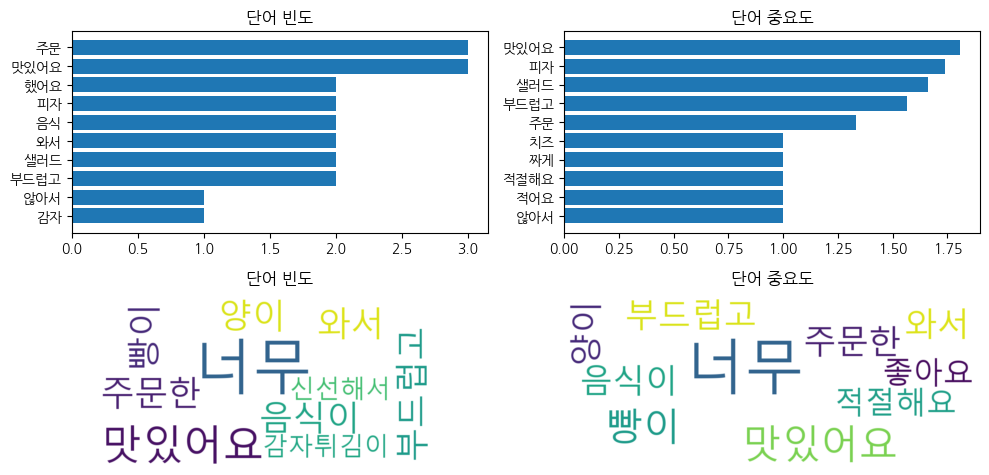

In [245]:
# 바 차트로 시각화
fig, axs = plt.subplots(2, 2, figsize=(10,5))

#단어 빈도
word_frequencies = df_x_vect_dtm.sum().nlargest(10).sort_values()
axs[0, 0].barh(word_frequencies.index, word_frequencies.values)
axs[0, 0].set_title('단어 빈도')


#단어 중요도
word_importances = df_x_tfidvect_dtm.sum().nlargest(10).sort_values()
axs[0, 1].barh(word_importances.index, word_importances.values)
axs[0, 1].set_title('단어 중요도')

#단어 빈도
axs[1, 0].imshow(wc_frequencies, interpolation='bilinear')
axs[1, 0].set_title('단어 빈도')
axs[1, 0].axis('off') # 축 표시 제거

#단어 중요도
axs[1, 1].imshow(wc_importances, interpolation='bilinear')
axs[1, 1].set_title('단어 중요도')
axs[1, 1].axis('off') # 축 표시 제거

# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [246]:
df['review3'].to_csv('data/sns_review.csv', index=False, encoding='utf-8-sig')

In [247]:
df = pd.read_csv('data/sns_review.csv', encoding='utf-8-sig')

In [248]:
df.head(2)

,review3
0,깔끔해서 좋아요 샐러드 맛
1,배고팠어요 늦게 와서 주문 음식


# Topic 모델링

In [249]:
# 토픽 모델링 import
from sklearn.decomposition import LatentDirichletAllocation

## 모델생성

In [250]:
n_components = 4  #토픽수
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2024)

In [251]:
LDA_model

LatentDirichletAllocation(n_components=4, random_state=2024)

## 벡터화 후 LDA Model에 학습 (CounterVectorize)

In [252]:
# 벡터화 된 데이터 확인
x_vect_dtm, x_tfidvect_dtm

(<22x30 sparse matrix of type '<class 'numpy.int64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <22x30 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>)

In [253]:
# 문서 - 주제
W = LDA_model.fit(x_vect_dtm).transform(x_vect_dtm)

In [254]:
W

array([[0.08342757, 0.74965259, 0.08345513, 0.0834647 ],
       [0.06253682, 0.81236458, 0.06254746, 0.06255114],
       [0.74546501, 0.08338395, 0.08772771, 0.08342333],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.74977415, 0.08338434, 0.08341749, 0.08342402],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.0416964 , 0.8739732 , 0.04262248, 0.04170792],
       [0.08341219, 0.08339496, 0.74974981, 0.08344304],
       [0.62440886, 0.12513309, 0.12522038, 0.12523768],
       [0.08346412, 0.74951662, 0.08350286, 0.0835164 ],
       [0.62473745, 0.12505936, 0.12509781, 0.12510538],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.12509719, 0.62464237, 0.12512535, 0.12513509],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.06255279, 0.06254125, 0.06256814, 0.81233782],
       [0.05004439, 0.05051725, 0.84937677, 0.05006158],
       [0.12521904, 0.62419109, 0.12528368, 0.12530618],
       [0.08346412, 0.74951662,

In [255]:
# topic과 연관된 단어
H = LDA_model.components_

In [256]:
H

array([[1.249474  , 3.24958656, 2.24932412, 0.25028157, 0.25043578,
        0.25007016, 0.25008809, 0.25019458, 0.25008809, 0.25007016,
        0.25024458, 0.25011797, 1.24882276, 0.25019458, 0.25019418,
        0.25019459, 0.25011797, 0.25007724, 0.25005555, 0.25024458,
        0.25019459, 0.25005555, 0.25024458, 1.24966422, 1.24947533,
        0.25005555, 1.249474  , 0.25007016, 1.25718367, 0.25012732],
       [0.25011886, 0.25009048, 0.25015286, 2.24896418, 1.24839429,
        0.25005489, 2.24967224, 1.24928395, 2.24967224, 0.25005489,
        0.2501912 , 0.25009227, 0.25026558, 1.24928395, 1.24928573,
        1.2492839 , 0.25009227, 3.24971095, 0.25004529, 0.2501912 ,
        1.2492839 , 0.25004529, 0.2501912 , 0.25007599, 0.25011866,
        0.25004529, 0.25011886, 0.25005489, 0.25032657, 1.24671096],
       [0.25019598, 0.25016249, 0.25025179, 0.25036305, 0.25056294,
        0.25009036, 0.2501175 , 0.25025099, 0.2501175 , 0.25009036,
        0.25031533, 1.24962602, 0.25043875, 0.

In [257]:
W.shape, H.shape

((22, 4), (4, 30))

### 시각화

In [258]:
df_lda_W_cvect = pd.DataFrame(W)

In [259]:
df_lda_W_cvect['review'] = df['review3']

In [260]:
df_lda_W_cvect.style.background_gradient(axis=1)

,0,1,2,3,review
0,0.083428,0.749653,0.083455,0.083465,깔끔해서 좋아요 샐러드 맛
1,0.062537,0.812365,0.062547,0.062551,배고팠어요 늦게 와서 주문 음식
2,0.745465,0.083384,0.087728,0.083423,맛있어요 피자
3,0.125122,0.125096,0.125158,0.624624,짜게 나왔어요 라면
4,0.749774,0.083384,0.083417,0.083424,맛있어요 된 배달 치킨
5,0.125122,0.125096,0.125158,0.624624,적어요 메뉴 설명 양
6,0.041696,0.873973,0.042622,0.041708,와서 했어요 주문 음식 다른 것 다시 주문
7,0.083412,0.083395,0.749750,0.083443,좋은데 적은 맛 양 좀 편이
8,0.624409,0.125133,0.125220,0.125238,매운 적절해요 떡볶이 맛
9,0.083464,0.749517,0.083503,0.083516,신선해서 좋았어요 초밥


In [261]:
df_lda_H_cvect = pd.DataFrame(H, columns=x_cvect.get_feature_names_out())

In [262]:
# 각 주제별로 어떤 단어가 있는지 확인
df_lda_H_cvect

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,1.249474,3.249587,2.249324,0.250282,0.250436,0.250070,0.250088,0.250195,0.250088,0.250070,...,0.250195,0.250056,0.250245,1.249664,1.249475,0.250056,1.249474,0.250070,1.257184,0.250127
1,0.250119,0.250090,0.250153,2.248964,1.248394,0.250055,2.249672,1.249284,2.249672,0.250055,...,1.249284,0.250045,0.250191,0.250076,0.250119,0.250045,0.250119,0.250055,0.250327,1.246711
2,0.250196,0.250162,0.250252,0.250363,0.250563,0.250090,0.250117,0.250251,0.250117,0.250090,...,0.250251,1.249822,0.250315,0.250125,0.250195,1.249822,0.250196,0.250090,1.241908,1.252985
3,0.250211,0.250160,0.250271,0.250391,0.250607,1.249785,0.250122,0.250270,0.250122,1.249785,...,0.250271,0.250077,1.249249,0.250135,0.250211,0.250077,0.250211,1.249785,0.250581,0.250177


In [263]:
df_lda_H_cvect.style.background_gradient(axis=1)

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,적어요,적은,적절해요,조절,좋아요,좋았어요,좋은데,주문,진해서,짜게,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,1.249474,3.249587,2.249324,0.250282,0.250436,0.250070,0.250088,0.250195,0.250088,0.250070,0.250245,0.250118,1.248823,0.250195,0.250194,0.250195,0.250118,0.250077,0.250056,0.250245,0.250195,0.250056,0.250245,1.249664,1.249475,0.250056,1.249474,0.250070,1.257184,0.250127
1,0.250119,0.250090,0.250153,2.248964,1.248394,0.250055,2.249672,1.249284,2.249672,0.250055,0.250191,0.250092,0.250266,1.249284,1.249286,1.249284,0.250092,3.249711,0.250045,0.250191,1.249284,0.250045,0.250191,0.250076,0.250119,0.250045,0.250119,0.250055,0.250327,1.246711
2,0.250196,0.250162,0.250252,0.250363,0.250563,0.250090,0.250117,0.250251,0.250117,0.250090,0.250315,1.249626,0.250439,0.250251,0.250250,0.250251,1.249626,0.250105,1.249822,0.250315,0.250251,1.249822,0.250315,0.250125,0.250195,1.249822,0.250196,0.250090,1.241908,1.252985
3,0.250211,0.250160,0.250271,0.250391,0.250607,1.249785,0.250122,0.250270,0.250122,1.249785,1.249249,0.250164,0.250473,0.250270,0.250270,0.250271,0.250164,0.250107,0.250077,1.249249,0.250271,0.250077,1.249249,0.250135,0.250211,0.250077,0.250211,1.249785,0.250581,0.250177


In [264]:
df_lda_H_cvect.loc[0].nlargest(10)

맛있어요     3.249587
부드럽고     2.249324
피자       1.257184
치즈케이크    1.249664
치킨       1.249475
감자       1.249474
튀김       1.249474
적절해요     1.248823
않아서      0.250436
샐러드      0.250282
Name: 0, dtype: float64

In [265]:
len(df_lda_H_cvect)

4

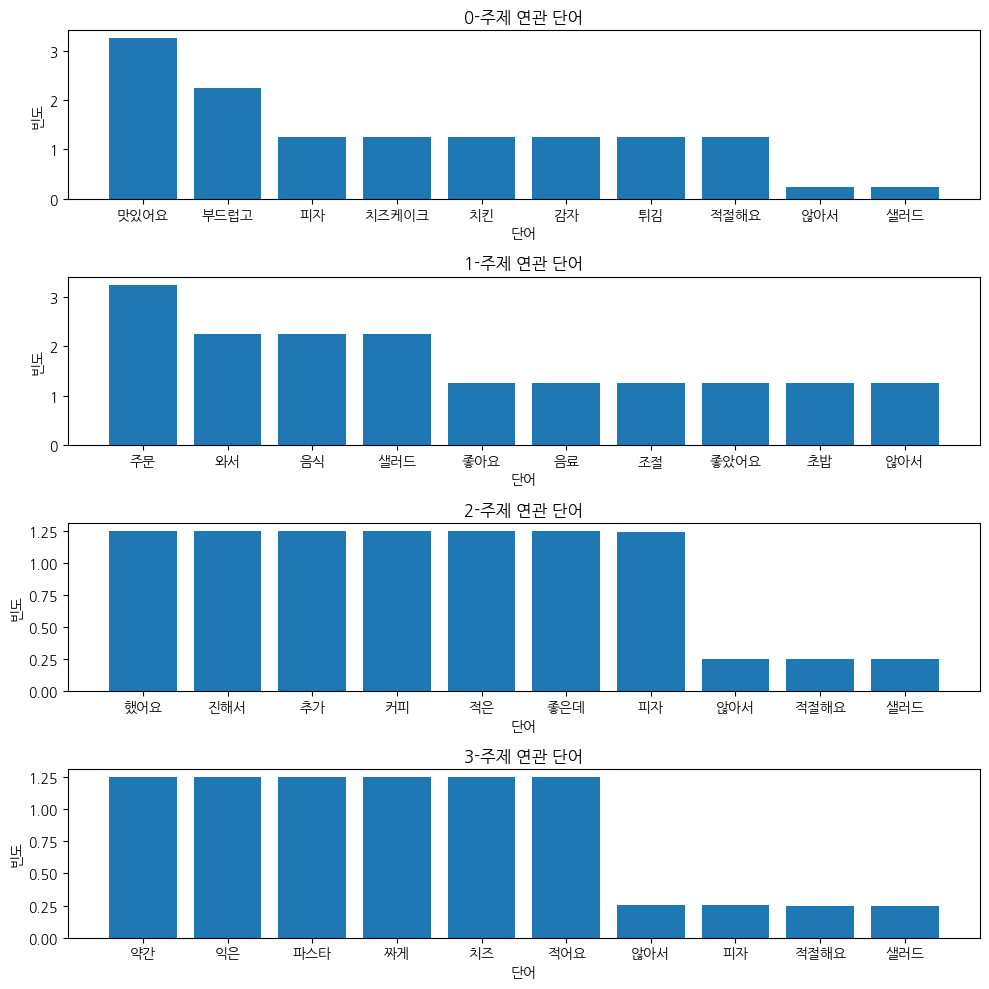

In [293]:
n = len(df_lda_H_cvect)
fig, axs = plt.subplots(n, 1, figsize=(10,10))

for i in range(n):
    data = df_lda_H_cvect.loc[i].nlargest(10)
    axs[i].bar(data.index, data.values)
    axs[i].set_title(f'{i}-주제 연관 단어')
    axs[i].set_xlabel('단어')
    axs[i].set_ylabel('빈도')

plt.tight_layout() # 서브 플롯간 간격 조절
plt.show()

## LDA Model에 학습 (TF-IDF)

In [267]:
# 문서 - 주제
W = LDA_model.fit(x_tfidvect_dtm).transform(x_tfidvect_dtm)

In [268]:
# topic과 연관된 단어
H = LDA_model.components_

### 시각화

In [269]:
df_lda_W_tfidvect = pd.DataFrame(W)

In [270]:
df_lda_W_tfidvect['review'] = df['review3']

In [271]:
df_lda_W_tfidvect.style.background_gradient(axis=1)

,0,1,2,3,review
0,0.103839,0.688512,0.103851,0.103798,깔끔해서 좋아요 샐러드 맛
1,0.091805,0.099634,0.091828,0.716733,배고팠어요 늦게 와서 주문 음식
2,0.680038,0.103746,0.111740,0.104476,맛있어요 피자
3,0.125226,0.125182,0.125243,0.624349,짜게 나왔어요 라면
4,0.687149,0.104046,0.104084,0.104720,맛있어요 된 배달 치킨
5,0.125226,0.125182,0.125243,0.624349,적어요 메뉴 설명 양
6,0.086857,0.729761,0.089045,0.094337,와서 했어요 주문 음식 다른 것 다시 주문
7,0.103743,0.103707,0.688854,0.103697,좋은데 적은 맛 양 좀 편이
8,0.624550,0.125138,0.125183,0.125129,매운 적절해요 떡볶이 맛
9,0.103807,0.688622,0.103826,0.103744,신선해서 좋았어요 초밥


In [272]:
df_lda_H_tfidvect = pd.DataFrame(H, columns=x_tfidvect.get_feature_names_out())

In [273]:
df_lda_H_tfidvect

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,0.956461,1.582610,0.250418,0.250334,0.250420,0.250270,0.250532,0.250302,0.250532,0.250270,...,0.250302,0.250167,0.250449,0.250508,1.030747,0.250167,0.956461,0.250270,0.986885,0.250434
1,0.250198,0.250407,0.250280,1.910617,1.248810,0.250218,0.624630,0.956251,0.624630,0.250218,...,0.956251,0.250141,0.250363,0.250219,0.250194,0.250141,0.250198,0.250218,0.250452,0.623270
2,0.250263,0.250585,0.250372,0.250359,0.250452,0.250290,0.250603,0.250325,0.250603,0.250290,...,0.250325,0.764025,0.250483,0.250291,0.250258,0.764025,0.250263,0.250290,1.253582,0.707715
3,0.250185,0.725364,1.816491,0.250253,0.250318,0.826572,0.829550,0.250229,0.829550,0.826572,...,0.250229,0.250127,1.248705,0.892322,0.250187,0.250127,0.250185,0.826572,0.250429,0.250409


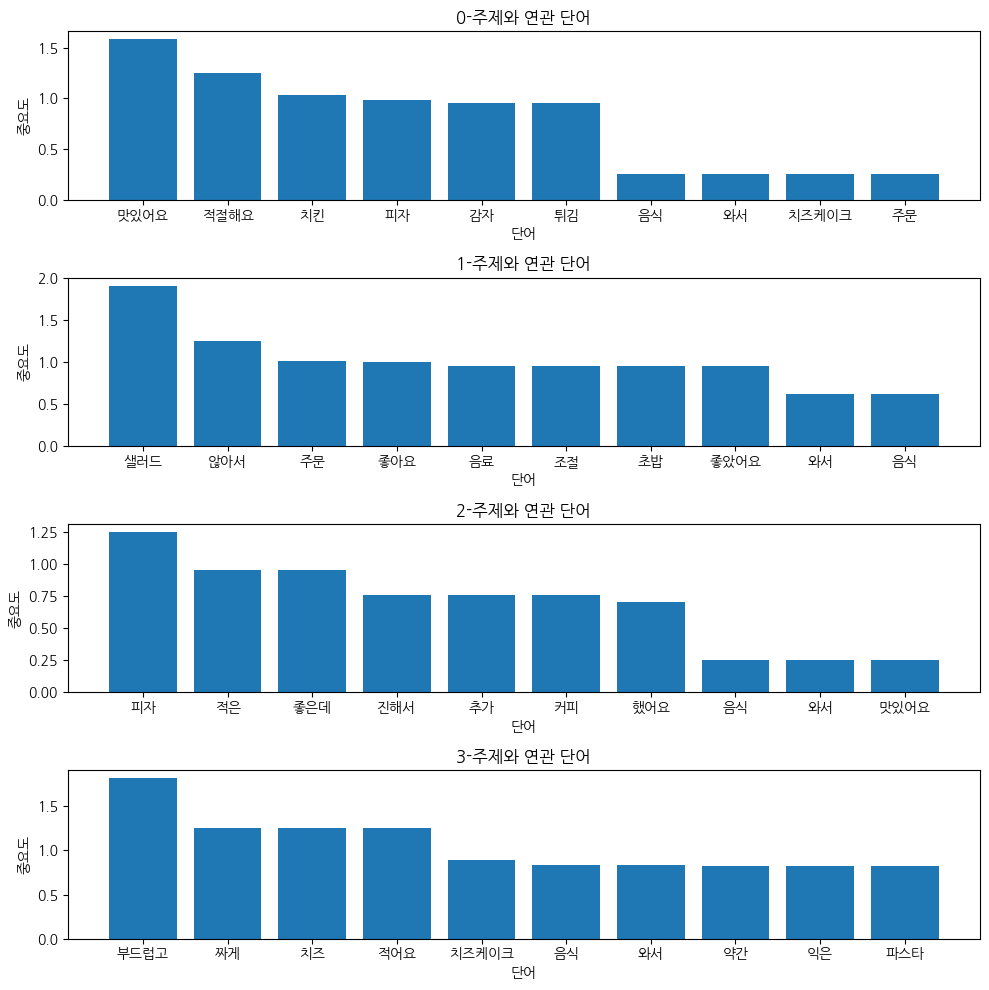

In [291]:
n = len(df_lda_H_tfidvect)
fig, axs = plt.subplots(n, 1, figsize=(10,10))

for i in range(n):
    data = df_lda_H_tfidvect.loc[i].nlargest(10)
    axs[i].bar(data.index, data.values)
    axs[i].set_title(f'{i}-주제와 연관 단어')
    axs[i].set_xlabel('단어')
    axs[i].set_ylabel('중요도')

plt.tight_layout() # 서브 플롯간 간격 조절
plt.show()

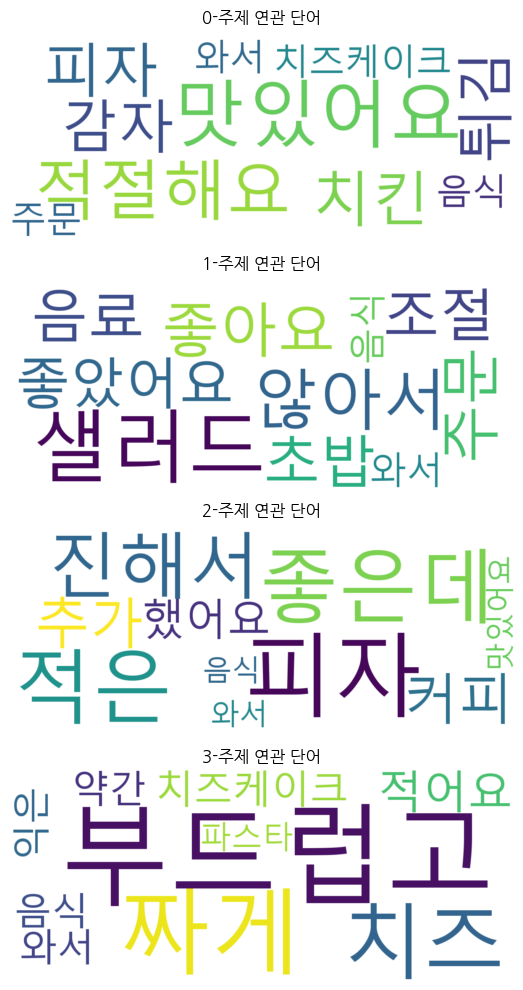

In [292]:
n = len(df_lda_H_tfidvect)
fig, axs = plt.subplots(n, 1, figsize=(10,10))

for i in range(n):
    data = df_lda_H_tfidvect.loc[i].nlargest(10)
    wc_importances = display_word_cloud_up(' '.join(data.index), dict(data))
    
    axs[i].imshow(wc_importances, interpolation='bilinear')
    axs[i].set_title(f'{i}-주제 연관 단어')
    axs[i].axis('off') # x, y축 눈금 제거

plt.tight_layout() # 서브 플롯간 간격 조절
plt.show()

# 군집화

* https://scikit-learn.org/stable/modules/clustering.html#k-means
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [334]:
# 군집화
from sklearn.cluster import KMeans
# 차원축소
from sklearn.manifold import TSNE

## 군집화

In [386]:
n_clusters=7
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2024)

In [387]:
# clusters = kmeans.fit(x_vect_dtm)     # 단어 빈도
clusters = kmeans.fit(x_tfidvect_dtm)   # 단어 중요도

In [388]:
clusters

KMeans(n_clusters=7, n_init='auto', random_state=2024)

In [389]:
kmeans.labels_

array([0, 1, 3, 3, 3, 2, 1, 3, 3, 6, 5, 3, 0, 3, 3, 3, 3, 4, 3, 3, 3, 5])

In [390]:
df_kmeans = pd.DataFrame()
df_kmeans['review'] = df['review3']
df_kmeans['label'] = kmeans.labels_

In [391]:
df_kmeans

,review,label
0,깔끔해서 좋아요 샐러드 맛,0
1,배고팠어요 늦게 와서 주문 음식,1
2,맛있어요 피자,3
3,짜게 나왔어요 라면,3
4,맛있어요 된 배달 치킨,3
5,적어요 메뉴 설명 양,2
6,와서 했어요 주문 음식 다른 것 다시 주문,1
7,좋은데 적은 맛 양 좀 편이,3
8,매운 적절해요 떡볶이 맛,3
9,신선해서 좋았어요 초밥,6


In [392]:
df_kmeans.sort_values(by='label')

,review,label
0,깔끔해서 좋아요 샐러드 맛,0
12,강했어요 샐러드 드레싱,0
1,배고팠어요 늦게 와서 주문 음식,1
6,와서 했어요 주문 음식 다른 것 다시 주문,1
5,적어요 메뉴 설명 양,2
16,좋았습니다 않아서 디저트 달,3
15,진해서 했어요 커피 물 더 추가,3
14,같아요 익은 파스타 약간 덜 것,3
13,맛있었어요 나초 치즈 소스,3
11,겼어요 스테이크 질,3


In [393]:
df_kmeans['label'].unique()

array([0, 1, 3, 2, 6, 5, 4])

In [394]:
df_kmeans['label'].value_counts()

label
3    13
0     2
1     2
5     2
2     1
6     1
4     1
Name: count, dtype: int64

## 차원축소

In [395]:
x_vect_dtm.shape

(22, 30)

In [396]:
x_tfidvect_dtm.shape

(22, 30)

30개를 2개로 줄이기
(2차원 상에 시각화를 위해서)

In [397]:
# # 차원축소
# help(TSNE)

In [398]:
# 차원 축소
n_components=2
tsne = TSNE(n_components=n_components,random_state=2024, init='random', perplexity=10)

In [399]:
tsne_result = tsne.fit_transform(x_vect_dtm)

In [400]:
df_tsne = pd.DataFrame(tsne_result, columns=['x','y'])
df_tsne['review'] = df['review3']
df_tsne['label'] = kmeans.labels_

In [401]:
df_tsne

,x,y,review,label
0,43.069557,49.240334,깔끔해서 좋아요 샐러드 맛,0
1,77.920128,-35.737385,배고팠어요 늦게 와서 주문 음식,1
2,-54.932930,-19.250139,맛있어요 피자,3
3,-25.298189,41.232124,짜게 나왔어요 라면,3
4,47.855377,4.136630,맛있어요 된 배달 치킨,3
5,0.496547,-13.339218,적어요 메뉴 설명 양,2
6,77.951035,-52.580166,와서 했어요 주문 음식 다른 것 다시 주문,1
7,-59.484867,47.812725,좋은데 적은 맛 양 좀 편이,3
8,15.947728,9.601726,매운 적절해요 떡볶이 맛,3
9,-74.921074,11.768075,신선해서 좋았어요 초밥,6


In [402]:
# # 팔레트 확인
# plt.colormaps()

Text(43.069557, 49.240334, '깔끔해서 좋아요  샐러드 맛 ')

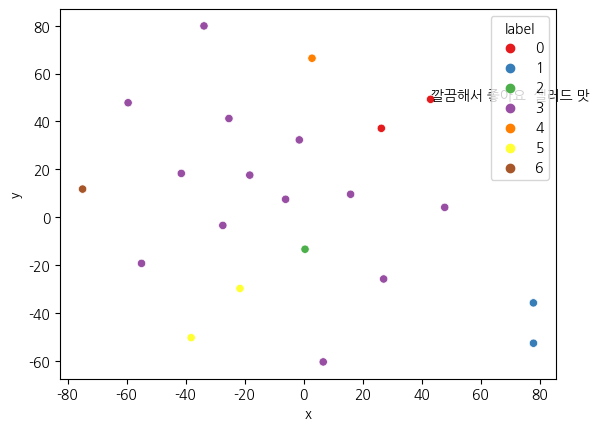

In [403]:
# 2차원 산점도 시각화
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label', palette='Set1')

plt.text(x=df_tsne.loc[0,'x'], y=df_tsne.loc[0,'y'], s=df_tsne.loc[0, 'review'])

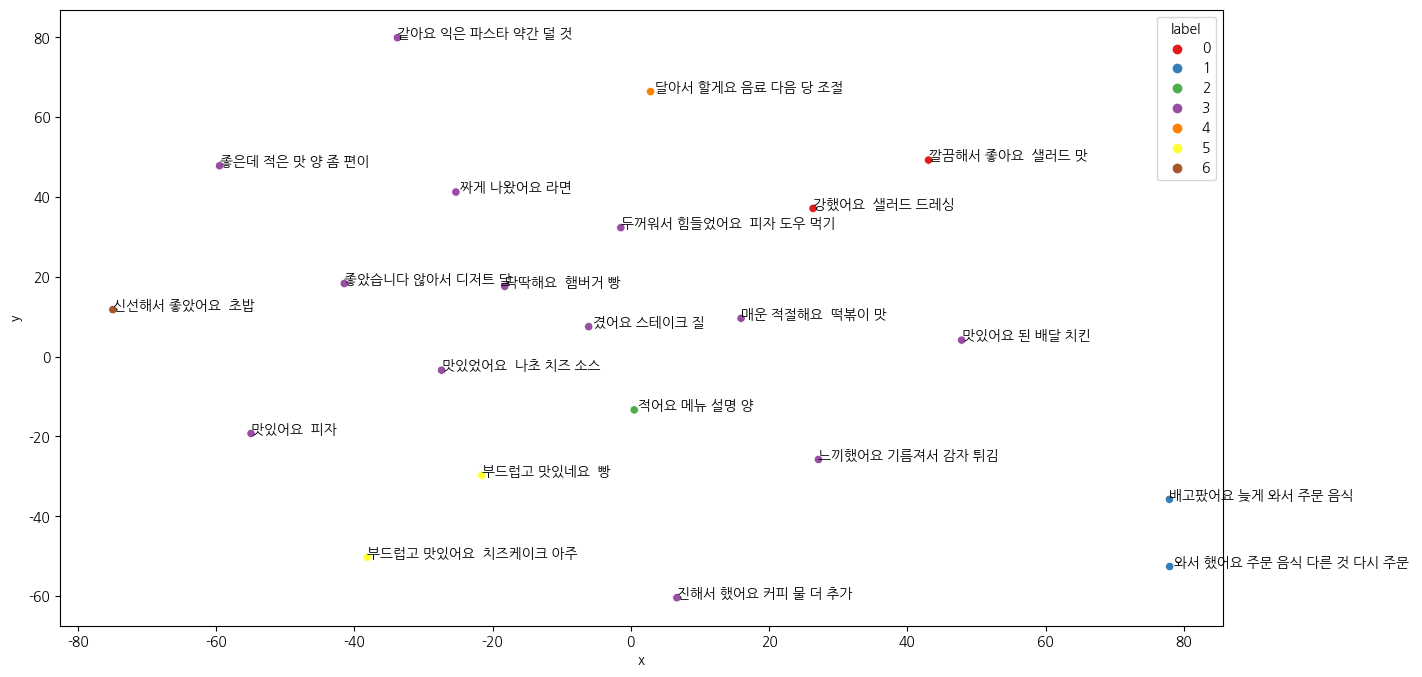

In [404]:
# 2차원 산점도 시각화
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label', palette='Set1')

for i in df_tsne.index:
    plt.text(x=df_tsne.loc[i,'x'], y=df_tsne.loc[i,'y'], s=df_tsne.loc[i, 'review'])

## 동일한 군집화 내에 단어 (빈도or중요도)

### 군집별 키워드 시각화

In [405]:
df_kmeans[df_kmeans['label']==0]

,review,label
0,깔끔해서 좋아요 샐러드 맛,0
12,강했어요 샐러드 드레싱,0


In [406]:
# 군집별 단어 빈도
df_x_vect_dtm.loc[df_kmeans[df_kmeans['label']==0].index]

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
# 군집별 단어 중요도
df_x_tfidvect_dtm.loc[df_kmeans[df_kmeans['label']==0].index]

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,0.0,0.0,0.0,0.661562,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 군집별 키워드 함수 정의

In [408]:
# 군집별 단어 빈도
def kmeans_cvect(class_no):
    df_x_vect_dtm.loc[df_kmeans[df_kmeans['label']==class_no].index]
    df_x_vect_dtm.sum().nlargest(10).plot(kind='bar', figsize=(6,3))

# 군집별 단어 중요도
def kmeans_tfidvect(class_no):
    df_x_tfidvect_dtm.loc[df_kmeans[df_kmeans['label']==class_no].index]
    df_x_tfidvect_dtm.sum().nlargest(10).plot(kind='bar', figsize=(6,3))

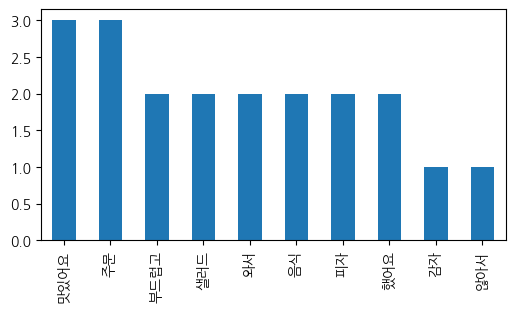

In [428]:
kmeans_cvect(1)

### 군집화 성능 측정

* 비슷한 데이터 포인트 끼리는 밀집해있고 다른 군집의 중심과는 떨어져있어야 한다.
* kmeans 학습 후, kmeans.inertia_ 값을 확인할 수 있고 이 값은 작으면 군집이 잘 되었음을 의미
* silhouette_score는 -1 ~ 1의 값을 가짐
  - 1에 가까울수록 군집이 잘되었음을 의미
  - -1에 가까울수록 군집내에 다른 군집의 데이터 포인터가 포함되어 있다. (불순하다)

In [410]:
# kmeans.inertia_ 값이 작을수록 잘 된 군집
kmeans.inertia_

10.873363972173692

In [411]:
from sklearn.metrics import silhouette_score

In [412]:
from tqdm import trange


inertia = []
silhouettes = []

# 군집을 2부터 20개까지 돌려본다
for n in trange(2, 21):
    kmeans = KMeans(n_clusters=n, n_init='auto', random_state=2024)
    kmeans.fit(x_vect_dtm)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(x_vect_dtm, kmeans.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.83it/s]


Text(0, 0.5, 'kmeans.inertia_ 값')

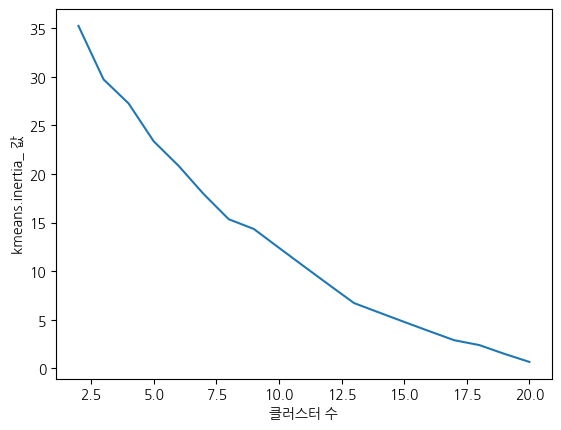

In [413]:
plt.plot(range(2, 21), inertia)
plt.xlabel('클러스터 수')
plt.ylabel('kmeans.inertia_ 값')

Text(0, 0.5, 'silhouette_score 값')

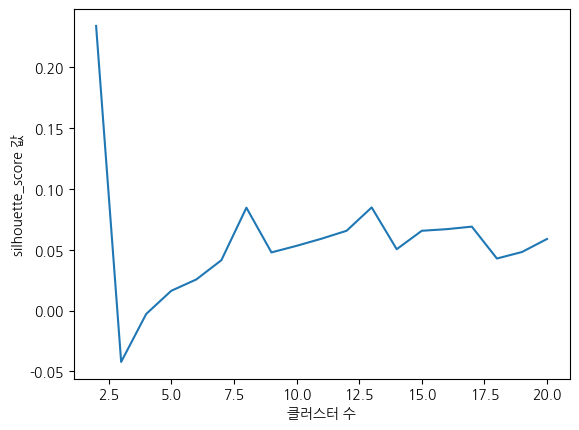

In [414]:
plt.plot(range(2, 21), silhouettes)
plt.xlabel('클러스터 수')
plt.ylabel('silhouette_score 값')